# Logistic Regression 

In [1]:
library("caret")
library("magrittr")
library("dplyr")
library("tidyr")
library("lmtest")
library("popbio")
library("e1071")

Warning message:
"package 'caret' was built under R version 4.1.3"
Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'tidyr' was built under R version 4.1.3"

Attaching package: 'tidyr'


The following object is masked from 'package:magrittr':

    extract


Warning message:
"package 'lmtest' was built under R version 4.1.3"
Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'popbio'


The following object is masked from 'package:caret':

    sensitivity


Warning message:
"package 'e1071' was built under R version 4.1.3"


In [2]:
baseball = read.csv('baseball.csv')

In [10]:
View(baseball)

Game,Team,Opp,W.L,R,RA,D.N,Att,Team.1,HR.Count,WinsR,Predicted
<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>
1,ARI,SFG,W,6,5,D,49016,ARI,1,1,neg
1,CHC,STL,L,3,4,N,47566,CHC,1,0,neg
1,NYY,TBR,L,3,7,D,31042,NYY,0,0,neg
1,SFG,ARI,L,5,6,D,49016,SF,2,0,pos
1,STL,CHC,W,4,3,N,47566,STL,1,1,neg
1,TBR,NYY,W,7,3,D,31042,TB,2,1,pos
1,ATL,NYM,L,0,6,D,44384,ATL,0,0,neg
1,BAL,TOR,W,3,2,D,45667,BAL,1,1,neg
1,BOS,PIT,W,5,3,D,36594,BOS,1,1,neg


### Test for appropriate Sample Size

In [4]:
# first, recode the DV to zeros and ones by creating a col WinsR
baseball$WinsR <- NA
baseball$WinsR[baseball$W.L=='W'] <- 1
baseball$WinsR[baseball$W.L=='L'] <- 0

In [7]:
# run the base logistic model
mylogit <- glm(WinsR ~ HR.Count, data=baseball, family="binomial")

In [8]:
# make predictions about wins and losses
probabilities <- predict(mylogit, type = "response")

In [9]:
# create a new col that has converted the probabilities to a positive and negative prediction
baseball$Predicted <- ifelse(probabilities > .5, "pos", "neg")

In [11]:
# recode the predicted var to 0 and 1:
baseball$PredictedR <- NA
baseball$PredictedR[baseball$Predicted=='pos'] <- 1
baseball$PredictedR[baseball$Predicted=='neg'] <- 0

In [12]:
#convert PredictedR and WinsR vars to factors
baseball$PredictedR <- as.factor(baseball$PredictedR)
baseball$WinsR <- as.factor(baseball$WinsR)

In [13]:
# create a confusion matrix
conf_mat <- caret::confusionMatrix(baseball$PredictedR, baseball$WinsR)
conf_mat

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1917 1240
         1  513 1190
                                          
               Accuracy : 0.6393          
                 95% CI : (0.6256, 0.6528)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.2786          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7889          
            Specificity : 0.4897          
         Pos Pred Value : 0.6072          
         Neg Pred Value : 0.6988          
             Prevalence : 0.5000          
         Detection Rate : 0.3944          
   Detection Prevalence : 0.6496          
      Balanced Accuracy : 0.6393          
                                          
       'Positive' Class : 0               
                        

### Logit Linearity

In [14]:
# perform a bit more wrangling to properly create your logit w/ numeric variables. select only numeric cols fr dataset
baseball1 <- baseball %>% 
dplyr::select_if(is.numeric)

In [15]:
predictors <- colnames(baseball1)

In [16]:
# create the logit
baseball1 <- baseball1 %>%
mutate(logit=log(probabilities/(1-probabilities))) %>%
gather(key= "predictors", value="predictor.value", -logit)

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 22 rows containing non-finite values (stat_smooth)."
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.14351"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.66398"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  0"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 1.7635"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
"pseudoinverse used at -0.14351"
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(

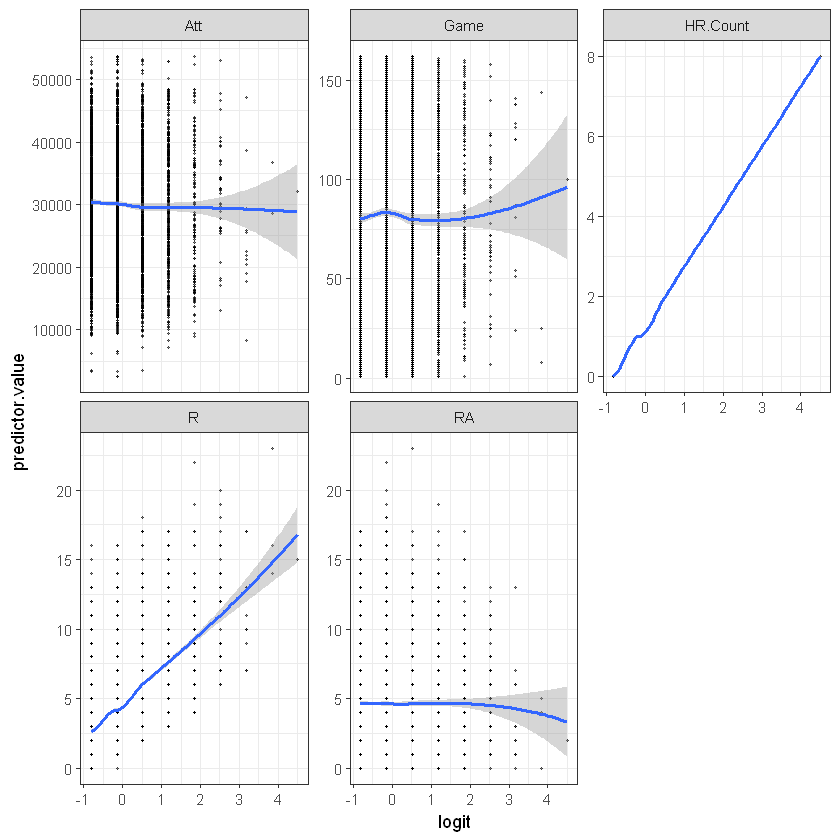

In [18]:
# graph to assess for linearity
ggplot(baseball1, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### Multicollinearity

In [19]:
#since this dataset only has one IV, skip this step.

### Independent Errors

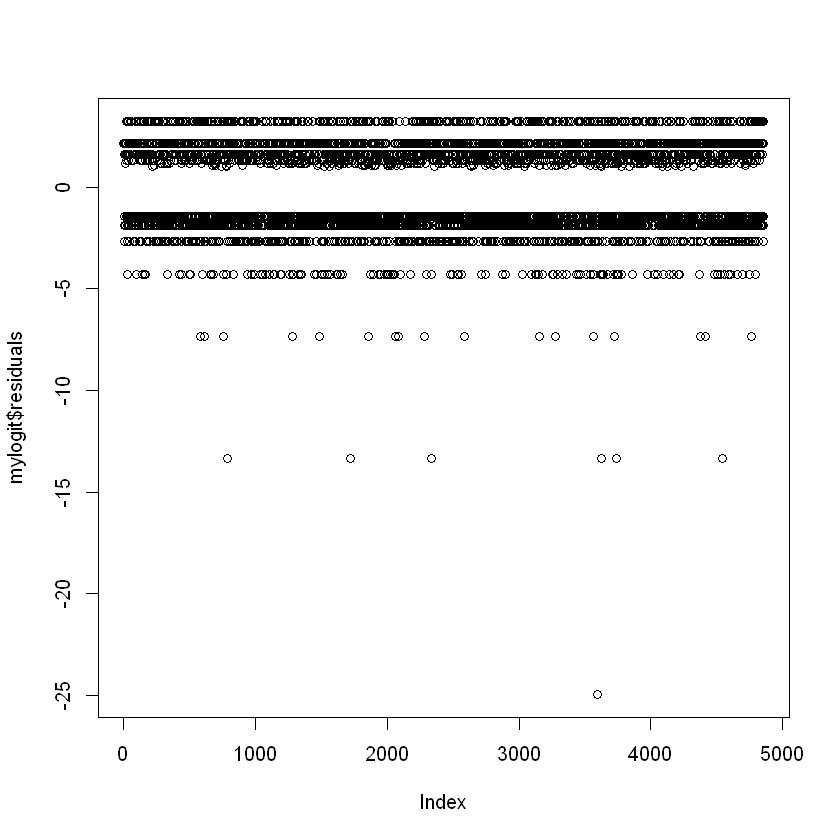

In [20]:
# graph the residuals over your index.  First way is to graph the errors:
plot(mylogit$residuals)
# observation: pretty even dist of points all across the x axis seen, so we have met the assumption for indep errors.

In [21]:
# another method: Durbin-Watson test
dwtest(mylogit, alternative="two.sided")
# p-value shows that there is significance (if it were >.05, it would automatically pass the assumption.
# however, look at DW value, and if it's between 1 and 3, you can say you have met the assumption for indep. errors


	Durbin-Watson test

data:  mylogit
DW = 2.0828, p-value = 0.003875
alternative hypothesis: true autocorrelation is not 0


### Screen for Outliers

In [22]:
infl <- influence.measures(mylogit)
summary(infl)

Potentially influential observations of
	 glm(formula = WinsR ~ HR.Count, family = "binomial", data = baseball) :

     dfb.1_ dfb.HR.C dffit   cov.r   cook.d hat  
16   -0.01   0.01     0.02    1.00_*  0.00   0.00
233  -0.01   0.01     0.01    1.00_*  0.00   0.00
275  -0.01   0.01     0.02    1.00_*  0.00   0.00
285  -0.01   0.01     0.02    1.00_*  0.00   0.00
309  -0.01   0.01     0.02    1.00_*  0.00   0.00
320  -0.01   0.01     0.02    1.00_*  0.00   0.00
327  -0.01   0.01     0.02    1.00_*  0.00   0.00
334  -0.01   0.01     0.02    1.00_*  0.00   0.00
345  -0.01   0.01     0.02    1.00_*  0.00   0.00
437  -0.01   0.01     0.02    1.00_*  0.00   0.00
498  -0.01   0.01     0.02    1.00_*  0.00   0.00
501  -0.01   0.01     0.02    1.00_*  0.00   0.00
586  -0.01   0.01     0.02    1.00_*  0.00   0.00
671  -0.01   0.01     0.01    1.00_*  0.00   0.00
679  -0.01   0.01     0.02    1.00_*  0.00   0.00
684  -0.01   0.01     0.02    1.00_*  0.00   0.00
694  -0.01   0.01     0.01    1.00_

In [23]:
# create a fxn that will print only the rows that are suspicious
#(dfb.1 or dffit w/ values >1, or hat>.3)

ERROR: Error in hat > 0.3: comparison (6) is possible only for atomic and list types


In [24]:
# run the logistical regression and interpret the output
summary(mylogit)
# p val is <.05, so significant- the # of home runs is a sig predictor of the number of wins and losses a team had.


Call:
glm(formula = WinsR ~ HR.Count, family = "binomial", data = baseball)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5366  -1.1171  -0.3553   1.2389   1.5338  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.80749    0.04658  -17.34   <2e-16 ***
HR.Count     0.66398    0.03044   21.81   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6737.4  on 4859  degrees of freedom
Residual deviance: 6161.4  on 4858  degrees of freedom
AIC: 6165.4

Number of Fisher Scoring iterations: 4


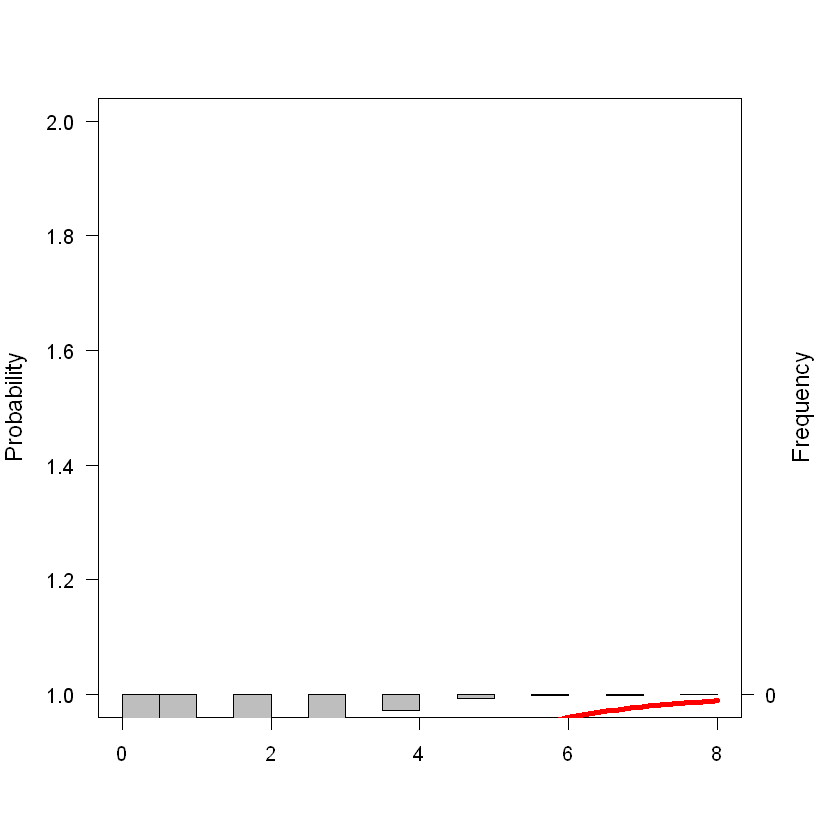

In [25]:
#graph the logistic model
logi.hist.plot(baseball$HR.Count,baseball$WinsR, boxp=FALSE, type="hist", col="gray")